<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

امیرحسین محمودی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 2
<br>
سوال 2
- تشخیص هرزنامه ها
<br>
200 نمره
    
    
____


### Full Name : 

### Student Number : 

---


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
در این تمرین می خواهیم مدلی ایجاد کنیم تا پیام های هرز را از پیام های معمولی تشخیص دهیم.
داده های داده شده حاوی دو ستون هستند .یکی ستون متن پیام و دیگری برچسب پیام که Spam نشان دهنده هرز بودن پیام و ham نشان دهنده پاک بودن پیام است.
</div>

# Libraries

In [288]:
! pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [289]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# add what you want

# Load data

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
داده ها را در فرمت مناسب زبان فارسی بخوانید
</div>

In [290]:
#TODO
df = pd.read_csv('emails.csv',encoding='UTF-8')
df.head()

,text,label
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham


# A. Exploratory Analysis (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

در صورتی که داده شما شامل مقادیر خالی است آن ها را حذف کنید.

یک ستون دیگر به داده ها اضافه کنید و طول هر پیام را در آن درج کیند.

نمودار تعداد پیام های هرز و غیر هرز برحسب طول پیام را رسم کنید.
</div>

In [291]:
df.describe()

,text,label
count,1000,1000
unique,1000,2
top,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham
freq,1,500


In [292]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [293]:
df['length'] = df['text'].apply(len)

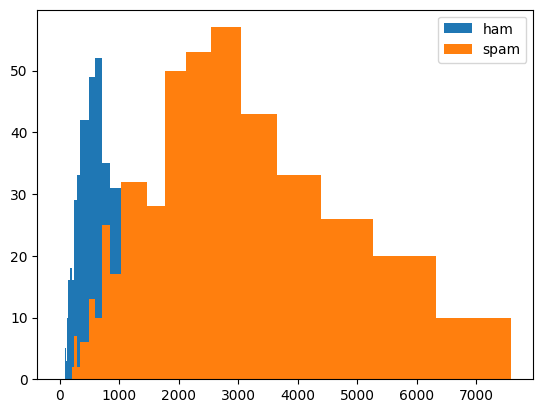

In [294]:
bins = 1.20**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins)
plt.hist(df[df['label']=='spam']['length'], bins=bins)
plt.legend(('ham','spam'))

plt.show()

# B. Text Cleaning (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

حال نیاز است تا [واژه های پالایشی](https://fa.wikipedia.org/wiki/%D9%88%D8%A7%DA%98%D9%87_%D9%BE%D8%A7%D9%84%D8%A7%DB%8C%D8%B4%DB%8C_(%D9%BE%D8%B1%D8%AF%D8%A7%D8%B2%D8%B4_%D8%B2%D8%A8%D8%A7%D9%86_%D8%B7%D8%A8%DB%8C%D8%B9%DB%8C))
(stop words) 
را به همراه بعضی علامت ها از متن ها حذف کنیم.
برای حذف علائم می توانید از کتابخانه string  استفاده کنید.

 می توانید فهرست کلمات پالایشی انگلیسی 
 ( با استفاده از  کتابخانه NLTK) 
 همراه با 
  فهرست کلمات پالایشی زبان فارسی  که در پوشه تمرین قراره داده شده است 
([منبع و اطلاعات بیشتر](https://github.com/ziaa/Persian-stopwords-collection))
 استفاده کنید.

 تابع زیر را به شکلی تکمیل کنید که با گرفتن یک متن کلمات پالایشی و علائم را از متن حذف کند.
 
 حال این تابع را روی داده های خود اجرا کنید و نتیجه را در ستونی به نام text_new ذخیره کنید.


</div>

In [295]:
with open('stopwords.txt',encoding="utf-8") as f:
    persian_stopwords = f.read().splitlines()

In [296]:
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords=stopwords.words('english')+persian_stopwords
#remove the punctuations and stopwords
import string
def text_process(text):


    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in (all_stopwords)]

    return " ".join(text)

df['text_new'] = df['text'].apply(text_process)
df.head()

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,length,text_new
0,﻿ممنون آقا سامان.\nمن پارسال اصلا آزاد شرکت نک...,ham,146,﻿ممنون سامان آزاد شرکت سراسری قبول نشدم میخواس...
1,﻿سلام آقای کریمی\nبالاخره آزمونارشد تموم شد من...,ham,347,﻿سلام کریمی آزمونارشد تموم یکم راهنمایی خوام م...
2,﻿درود بر حاج وحیدی بنده بعنوان یک دکتری تاریخ ...,ham,360,﻿درود حاج وحیدی بنده بعنوان دکتری تاریخ دستی ت...
3,﻿با سلام و احترام\nضمن تقدیر از مسولین محترم ...,ham,330,﻿با سلام احترام تقدیر مسولین محترم سایت تابناک...
4,﻿با سلام اینجانب یک دستگاه خودرو پراید 131 با ...,ham,290,﻿با سلام اینجانب دستگاه خودرو پراید 131 شماره ...


# C. Word Cloud (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
حال می خواهیم ابر کلمات هر دسته را رسم کنیم تا کلمات کلیدی هرزنامه ها را به صورت چشمی بررسی کنیم.

برای اینکار ابتدا با مفهوم [tokenization](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization) آشنا می شویم.
در واقع نیاز داریم تا جملات را به یک سری token (مفهومی شبیه به کلمه)
بشکنیم.

برای ساخت ابر کلمات نیاز است تا هر جمله راه به token هایی تبدیل کنیم.
سپس تمام token های پیام های هرز  را در یک رشته با فاصله کنار هم قرار دهیم.
همین کار را برای دسته پیام های پاک نیز انجام می دهیم.
حال با استفاده از این رشته ها می توان ابر کلمات هر دسته را ایجاد کرد.
</div>

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
جهت تبدیل جملات به token  میتوان از ابزار های کتابخانه NLTK استفاده کرد.

اما ما برای بالا بردن دقت کار از کتابخانه [هضم](https://www.roshan-ai.ir/hazm/docs/)
 که برای زبان فارسی توسعه داده شده است استفاده می کنیم.
</div>

In [297]:
! pip install hazm


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [298]:
from __future__ import unicode_literals
from hazm import word_tokenize
# Import nltk packages and Punkt Tokenizer Models
# import nltk
# nltk.download("punkt")
# import warnings
# warnings.filterwarnings('ignore')
# from nltk.tokenize import sent_tokenize, word_tokenize

In [299]:
ham_words = ''
spam_words = ''
# Creating a corpus of spam messages
for text in df[df['label'] == 'spam'].text:
    
    tokens = word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for text in df[df['label'] == 'ham'].text:
    
    tokens = word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای رسم ابر کلمات به زبان انگلیسی می توان از کتابخانه WordCloud استفاده کرد.این کتابخانه از زبان فارسی پشتیبانی نمی کند

برای رسم ابر کلمات در زبان فارسی از کتابخانه  [WordCloud_fa](https://pypi.org/project/wordcloud-fa/)
استفاده می کنیم.
</div>


In [300]:
! pip install wordcloud-fa


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: C:\Users\HP OMEN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [301]:
from wordcloud_fa import WordCloudFa

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
ابر کلمات دو دسته هرز و غیر هرز را رسم کنید
</div>

In [302]:
spam_wordcloud = WordCloudFa(width=1000, height=600,persian_normalize=True,background_color="white", stopwords=all_stopwords).generate(spam_words)
ham_wordcloud = WordCloudFa(width=1000, height=600,persian_normalize=True,background_color="white", stopwords=all_stopwords).generate(ham_words)

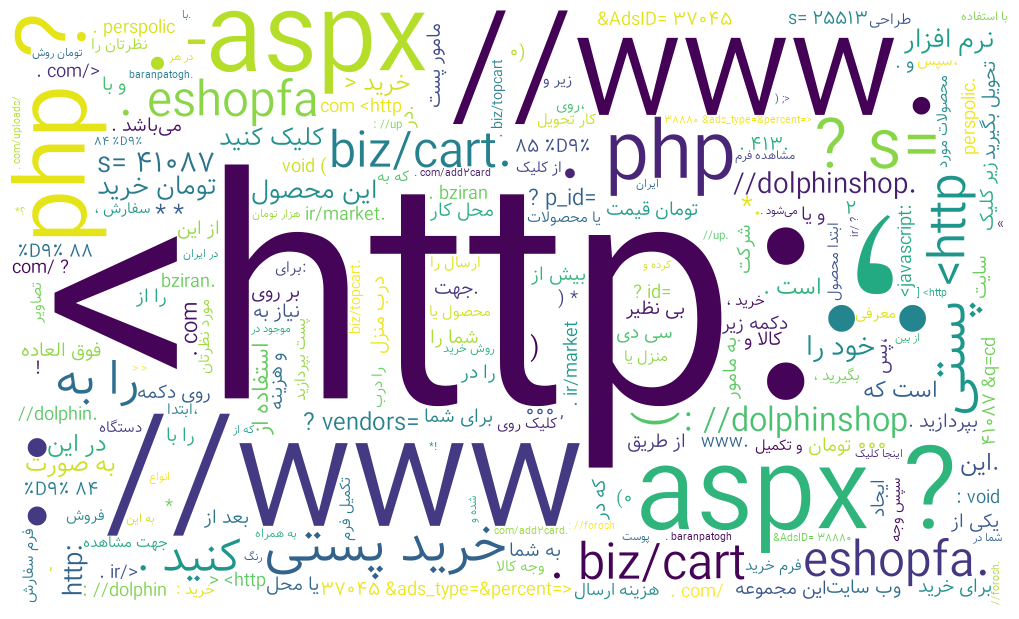

In [303]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

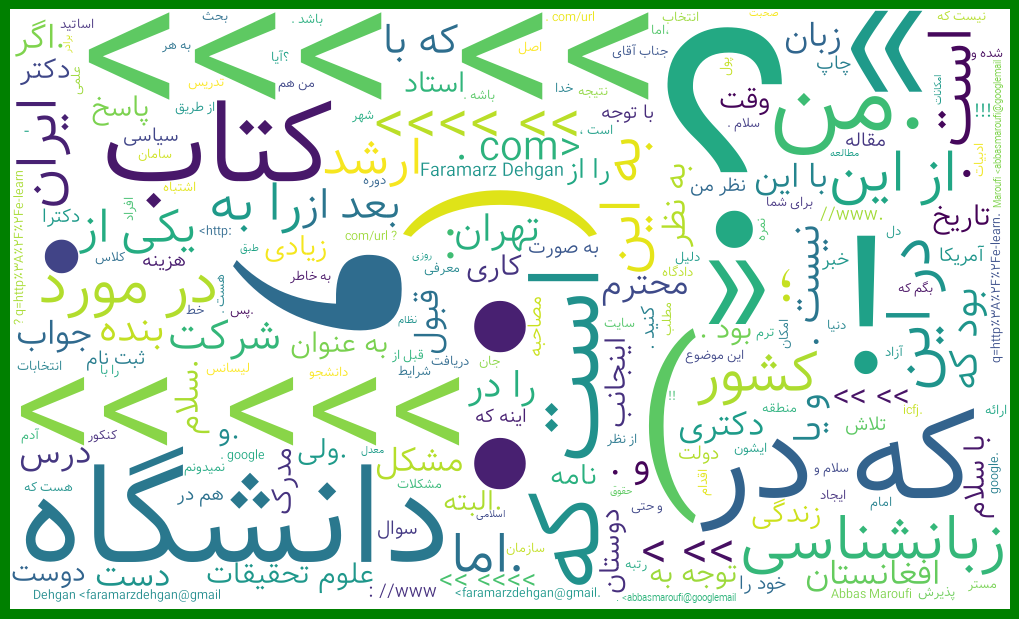

In [304]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# D. Vectorization (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از جملات برای یادگیری ماشین نیاز است تا آن ها را به شکل برداری تبدیل کنیم.برای این کار روش های مختلفی وجود دارد.


 ما در اینجا از روش  [فراوانی وزنی تی‌اف-آی‌دی‌اف](https://fa.wikipedia.org/wiki/%D9%81%D8%B1%D8%A7%D9%88%D8%A7%D9%86%DB%8C_%D9%88%D8%B2%D9%86%DB%8C_%D8%AA%DB%8C%E2%80%8C%D8%A7%D9%81-%D8%A2%DB%8C%E2%80%8C%D8%AF%DB%8C%E2%80%8C%D8%A7%D9%81)
  استفاده می کنیم.برای اینکار می توانید از [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) کتابخانه sklearn استفاده کنید.
  
  برای دریافت اسم فیچر ها می توانید از دستور get_feature_names_out روی تبدیل کننده بردار استفاده کنید.

In [305]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_vectorized= tfidf_vectorizer.fit_transform(df['text_new'])
X_tfidf_vectorized.shape

(1000, 28069)

In [306]:
#extra. another method
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X_count_vectorized = count_vectorizer.fit_transform(df['text_new'])
# words=vectorizer.get_feature_names_out()
# pd.DataFrame(words).head(n=200)


In [307]:
tfidf_vectorizer.get_feature_names_out().shape

(28069,)

# E. Data Preparation (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از داده ها نیاز است تا دسته هر داده را به شکل عددی ذخیره کنیم.

</div>


In [308]:
df=pd.get_dummies(df,columns=['label'],drop_first=True)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
متغیر های  پیشبینی و هدف را ایجاد کرده و به شکل مناسب آن ها برای آموزش و تست جدا کنید.

In [309]:
y = df['label_spam']
y.shape

(1000,)

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vectorized, y, test_size=0.33, random_state=42)

# F. Model Training (80 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با استفاده از روش هایی که تا اینجا یاد گرفتید(SVM , Decision Tree, Random Forest) مدل خود را آموزش دهید و معیار های آن ها را با هم مقایسه کنید.

برای روش SVM ماتریس در هم ریختگی را رسم کنید.

برای روش درخت تصمیم نمودار درخت خود را در یک فایل pdf خروجی بگیرید.
</div>

In [311]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score
def results(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy_score:', accuracy_score(y_test, y_pred))
    print('precision_score:', precision_score(y_test, y_pred))
    print('roc_auc_score:', roc_auc_score(y_test, y_pred))

In [312]:
#TODO
from sklearn.svm import LinearSVC
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)
y_test_pred_svm = svm_clf.predict(X_test)



In [313]:
results(y_test,y_test_pred_svm)

[[161   4]
 [  7 158]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       165
           1       0.98      0.96      0.97       165

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330

accuracy_score: 0.9666666666666667
precision_score: 0.9753086419753086
roc_auc_score: 0.9666666666666667


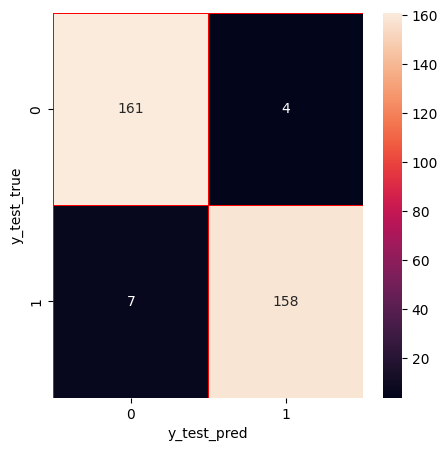

In [314]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred_svm)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_test_pred")
plt.ylabel("y_test_true")
plt.show()

In [315]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
y_test_pred_tree = tree_clf.predict(X_test)


In [316]:
results(y_test,y_test_pred_tree)

[[151  14]
 [ 17 148]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       165
           1       0.91      0.90      0.91       165

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

accuracy_score: 0.906060606060606
precision_score: 0.9135802469135802
roc_auc_score: 0.9060606060606061


In [317]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data = export_graphviz(tree_clf, 
                out_file=None, 
                 feature_names=list(tfidf_vectorizer.get_feature_names_out()),
            class_names=['Clean','Spam'],
                rounded=True,
                filled=True)

graph = graphviz.Source(dot_data) 
graph.render("result_tree") 

'result_tree.pdf'

In [318]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=DecisionTreeClassifier()
rf_clf.fit(X_train, y_train)
y_test_pred_rf = tree_clf.predict(X_test)


In [319]:
results(y_test,y_test_pred_rf)

[[151  14]
 [ 17 148]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       165
           1       0.91      0.90      0.91       165

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

accuracy_score: 0.906060606060606
precision_score: 0.9135802469135802
roc_auc_score: 0.9060606060606061


# G. Predictor function (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
یک تابع ایجاد کنید که با دریافت مدل ، تبدیل کننده برداری و یک متن به شما بگوید که آیا این پیام هرز است یا خیر.

تابع خود را با ورودی های داده شده تست کنید.
</div>

In [320]:
def isSpam(model,vectorizer,texts):
    
    result=pd.DataFrame(texts,columns=['text'])
    y_pred=model.predict(vectorizer.transform(texts))
    result['response']=y_pred
    result['response'].loc[y_pred==1]="Spam"
    result['response'].loc[y_pred==0]="Good"

    return result


In [321]:
samples=['سلام محمود خوبی؟نگران شدم','این محصول را ازینجا خریدپستی کنید']
isSpam(svm_clf,tfidf_vectorizer,samples)

,text,response
0,سلام محمود خوبی؟نگران شدم,Good
1,این محصول را ازینجا خریدپستی کنید,Spam
